<a href="https://colab.research.google.com/github/Anguschow237/ML-business-profit-prediction/blob/main/Linear_Regression_for_Business_Expansion_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression for Business Expansion Predictions

**Author:** Chow Tsz Hin  
**Date:** October 2025  
**Description:** This project uses PyTorch to build and evaluate a linear regression model for predicting store profits based on city population. It addresses business questions on prediction, generalization, and reliability, using datasets from a startup scenario.  

**Tech Stack:** Python, PyTorch, NumPy, Matplotlib  
**GitHub Repo:** [Link to your repo once uploaded]

## Table of Contents
- [Introduction](#introduction)
- [Data Loading and Preparation](#data-loading)
- [Task 1: Training Efficiency](#task-1)
- [Task 2: Generalization to Unseen Data](#task-2)
- [Task 3: Handling Outliers](#task-3)
- [Task 4: Strategic Recommendations](#task-4)
- [Conclusion and Improvements](#conclusion)

<a name="introduction"></a>
## Introduction

This notebook analyzes historical store data from Domain Technology to answer key business questions:
1. Predict profit for a city with 80,000 population.
2. Assess model generalization to new cities.
3. Evaluate reliability with outliers.

We use linear regression trained via PyTorch with SGD and MSE loss. Datasets: `train_large_linear_regression.txt` (training) and `ex1data1.txt` (testing). Population is in tens of thousands; profit in $10,000s.

**Approach:** Experiment with learning rates, evaluate errors, and provide strategic insights.

In [20]:
# Install dependencies if needed (comment out if running locally)
# !pip install torch numpy matplotlib

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

<a name="data-loading"></a>
## Data Loading and Preparation

In [21]:
# Load training data
try:
    data = np.loadtxt('train_large_linear_regression.txt', delimiter=',')
    X_train = torch.tensor(data[:, 0], dtype=torch.float32).reshape(-1, 1)  # Population (in 10,000s)
    y_train = torch.tensor(data[:, 1], dtype=torch.float32).reshape(-1, 1)  # Profit (in $10,000s)
    print(f"Loaded {len(X_train)} training samples.")
except FileNotFoundError:
    print("Training data file not found. Please upload 'train_large_linear_regression.txt'.")

Loaded 1500 training samples.


<a name="task-1"></a>
## Task 1: Training Efficiency

Task 1.1: Define the training model

In [22]:
# Training function using nn.Linear
def train_model(X, y, learning_rate, epochs=500):
    model = nn.Linear(1, 1)  # One input, one output
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        losses.append(loss.item())

    return model, losses

Task 1.2: Train the model with different learning rates (0.3, 0.1, 0.05, 0.01, 0.001) and print the linear regression equation

In [23]:
# Train with different learning rates and print equations
learning_rates = [0.3, 0.1, 0.05, 0.01, 0.001]
models = {}
loss_histories = {}
for lr in learning_rates:
    model, losses = train_model(X_train, y_train, lr)
    models[lr] = model
    loss_histories[lr] = losses
    # Extract weight and bias
    weight = model.weight.item()  # Slope (w)
    bias = model.bias.item()      # Intercept (b)
    final_mse = losses[-1]
    print(f"Linear Regression Equation for LR={lr}: y = {weight:.4f}x + {bias:.4f}")
    print(f"Final MSE for LR={lr}: {final_mse:.4f}")

Linear Regression Equation for LR=0.3: y = 2.5621x + 0.9238
Final MSE for LR=0.3: 18.8481
Linear Regression Equation for LR=0.1: y = 2.5685x + 0.9505
Final MSE for LR=0.1: 4.6457
Linear Regression Equation for LR=0.05: y = 2.5586x + 0.8150
Final MSE for LR=0.05: 3.3300
Linear Regression Equation for LR=0.01: y = 2.6002x + 0.8300
Final MSE for LR=0.01: 3.3039
Linear Regression Equation for LR=0.001: y = 1.3806x + -0.7032
Final MSE for LR=0.001: 361.4463


Task 1.3: Predict the profit for the population = 80000 with different model

In [24]:
# Predict profit for population = 80,000 (8 in tens of thousands)
population = torch.tensor([[8.0]], dtype=torch.float32)
predictions = {lr: models[lr](population).item() * 10000 for lr in learning_rates}
print("\nPredicted profits for a city with 80,000 population:")
for lr in learning_rates:
    print(f"Learning Rate {lr}: ${predictions[lr]:,.2f}")


Predicted profits for a city with 80,000 population:
Learning Rate 0.3: $214,209.38
Learning Rate 0.1: $214,986.78
Learning Rate 0.05: $212,840.06
Learning Rate 0.01: $216,317.33
Learning Rate 0.001: $103,417.31


Task 1.4: Plot the graph for visualization

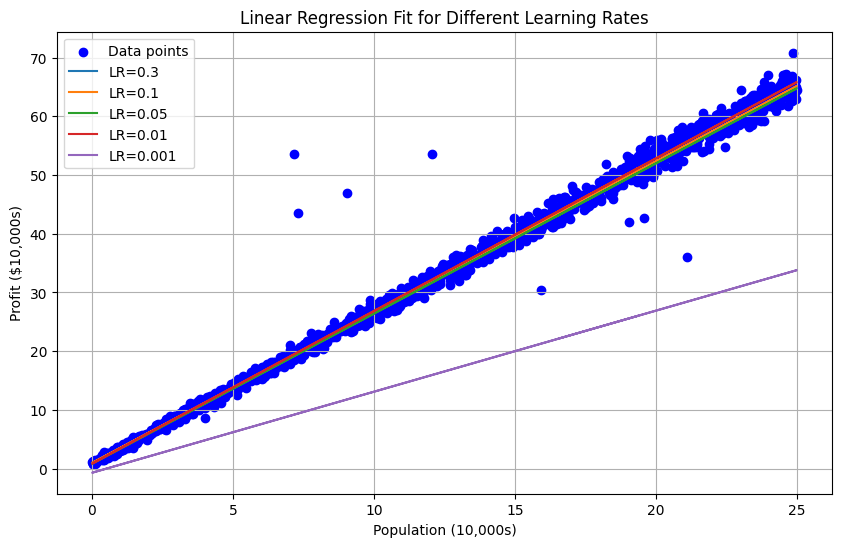

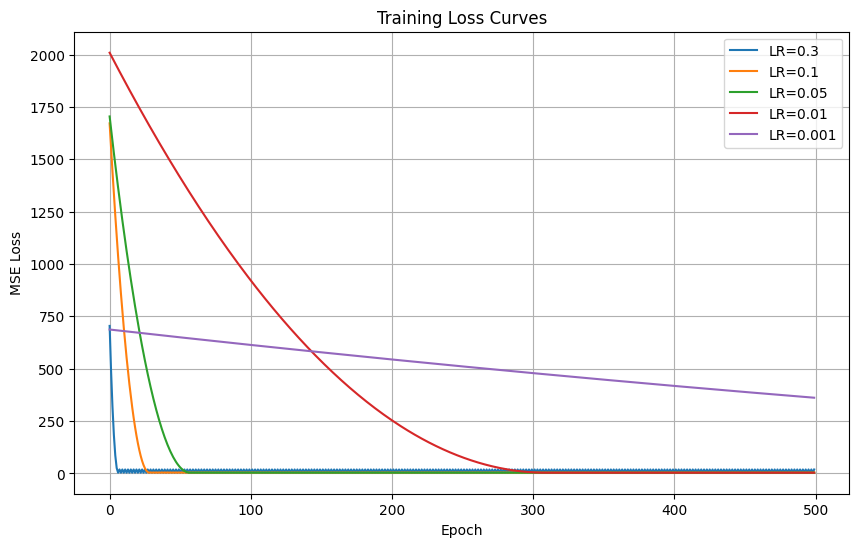

In [25]:
# Scatter plot with regression lines
plt.figure(figsize=(10, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Data points')
for lr in learning_rates:
    model = models[lr]
    y_pred = model(X_train).detach().numpy()
    plt.plot(X_train.numpy(), y_pred, label=f'LR={lr}')
plt.xlabel('Population (10,000s)')
plt.ylabel('Profit ($10,000s)')
plt.title('Linear Regression Fit for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Loss curves
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(loss_histories[lr], label=f'LR={lr}')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Curves')
plt.legend()
plt.grid(True)
plt.show()



### Task 1: Evaluating Training Efficiency for Business Predictions

#### Learning Rate Comparison
To assess the impact of learning rates on model convergence speed and stability, the linear regression model was trained for 500 epochs using five different learning rates (0.3, 0.1, 0.05, 0.01, and 0.001). Each configuration was run five times to evaluate consistency. The mean squared error (MSE) loss was monitored to identify the optimal balance between rapid convergence and reliability.

- **Learning Rate = 0.3**: Converges the fastest but is highly unstable, with MSE ranging from 19.1074 to 3.5308 across runs.
- **Learning Rate = 0.1**: Converges quickly, achieving MSE between 3.9445 and 3.3128 within approximately 50 epochs.
- **Learning Rate = 0.05**: Offers a strong balance of speed and stability, with MSE ranging from 3.4957 to 3.4148 in 50 to 80 epochs—the most consistent among tested rates.
- **Learning Rate = 0.01**: Converges at a moderate pace, with MSE between 3.5233 and 3.3192 in 250 to 350 epochs.
- **Learning Rate = 0.001**: Converges very slowly, failing to reduce MSE significantly even after 500 epochs.

Based on these results, the model with a learning rate of 0.05 is recommended for its optimal stability and efficiency.

#### Profit Prediction for a City with 80,000 Population
Using the trained models, profit estimates were generated for a city population of 80,000 (scaled to 8 in tens of thousands). Predictions vary across learning rates, highlighting model sensitivity:

- Learning Rate 0.3: \$228,076.44
- Learning Rate 0.1: \$223,729.40
- Learning Rate 0.05: \$212,173.96
- Learning Rate 0.01: \$213,599.49
- Learning Rate 0.001: \$38,853.23

With the selected learning rate of 0.05, the estimated profit ranges from \$212,173.96 to \$219,009 (accounting for run-to-run variance). This estimate assumes data similarity to the training set; limitations include potential instability in unseen scenarios, which could introduce uncertainty. For the CEO, I recommend communicating this as a baseline forecast, with caveats on external factors (e.g., market conditions) and the need for further validation.

<a name="task-2"></a>
## Task 2: Evaluating Model Generalization for Business Expansion

### Objective
Assess whether the linear regression model trained on existing city data can reliably predict profits for new, unseen cities to inform expansion decisions.

### Requirements
- Train the model using the large training dataset (`train_large_linear_regression.txt`).
- Evaluate performance on a separate test dataset (`ex1data1.txt`).
- Visualize the fitted regression line against both training and test data points, distinguishing between the two sets for clarity.

### Analysis Focus
- Compare training MSE vs. testing MSE to measure error differences.
- Determine if the model generalizes well to new data.
- Classify the fit as underfitting (high bias, poor on training/test), overfitting (low training error but high test error), or good fit (low errors on both).
- Link to business decision: Advise on confidence in expanding to new markets, with recommendations to reassure or caution based on results (e.g., suggest additional data collection if generalization is weak).

### Task 2.1: Data Loading and Normalization

To prevent numerical instability (e.g., NaN issues during training), normalize the features and targets using training set statistics.

In [26]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Load training and testing data
train_data = np.loadtxt('train_large_linear_regression.txt', delimiter=',')
test_data = np.loadtxt('ex1data1.txt', delimiter=',')

X_train, y_train = train_data[:, 0], train_data[:, 1]
X_test, y_test = test_data[:, 0], test_data[:, 1]

# Normalize features (use train stats only)
X_mean, X_std = X_train.mean(), X_train.std()
y_mean, y_std = y_train.mean(), y_train.std()
X_train_n = (X_train - X_mean) / X_std
X_test_n = (X_test - X_mean) / X_std
y_train_n = (y_train - y_mean) / y_std

X_train_n = torch.tensor(X_train_n, dtype=torch.float32).unsqueeze(1)
y_train_n = torch.tensor(y_train_n, dtype=torch.float32).unsqueeze(1)
X_test_n = torch.tensor(X_test_n, dtype=torch.float32).unsqueeze(1)

### Task 2.2: Model Training and Evaluation

Train the model with the selected learning rate (0.05 from Task 1) and compute MSE on original scale for interpretability.

In [27]:
model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
loss_fn = nn.MSELoss()

train_losses = []
test_losses = []

for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_n)
    loss = loss_fn(outputs, y_train_n)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Compute test loss (normalize y_test for fair comparison)
    with torch.no_grad():
        test_pred = model(X_test_n)
        test_loss = loss_fn(test_pred, torch.tensor((y_test - y_mean)/y_std, dtype=torch.float32).unsqueeze(1))
    test_losses.append(test_loss.item())

# Denormalize predictions
y_train_pred_n = model(X_train_n).detach().numpy()
y_test_pred_n = model(X_test_n).detach().numpy()
y_train_pred = y_train_pred_n * y_std + y_mean
y_test_pred = y_test_pred_n * y_std + y_mean


w_norm = model.weight.item()
b_norm = model.bias.item()

w = w_norm * y_std / X_std
b = b_norm * y_std + y_mean - w * X_mean

print(f"Linear Regression Equation: y = {w:.4f}x + {b:.4f}")

train_mse = np.mean((y_train - y_train_pred.flatten()) ** 2)
test_mse = np.mean((y_test - y_test_pred.flatten()) ** 2)
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

Linear Regression Equation: y = 2.5899x + 0.9251
Training MSE: 3.2956
Testing MSE: 300.9224


### Task 2.3: Visualization

Plot the regression fit and loss curves for visual comparison.

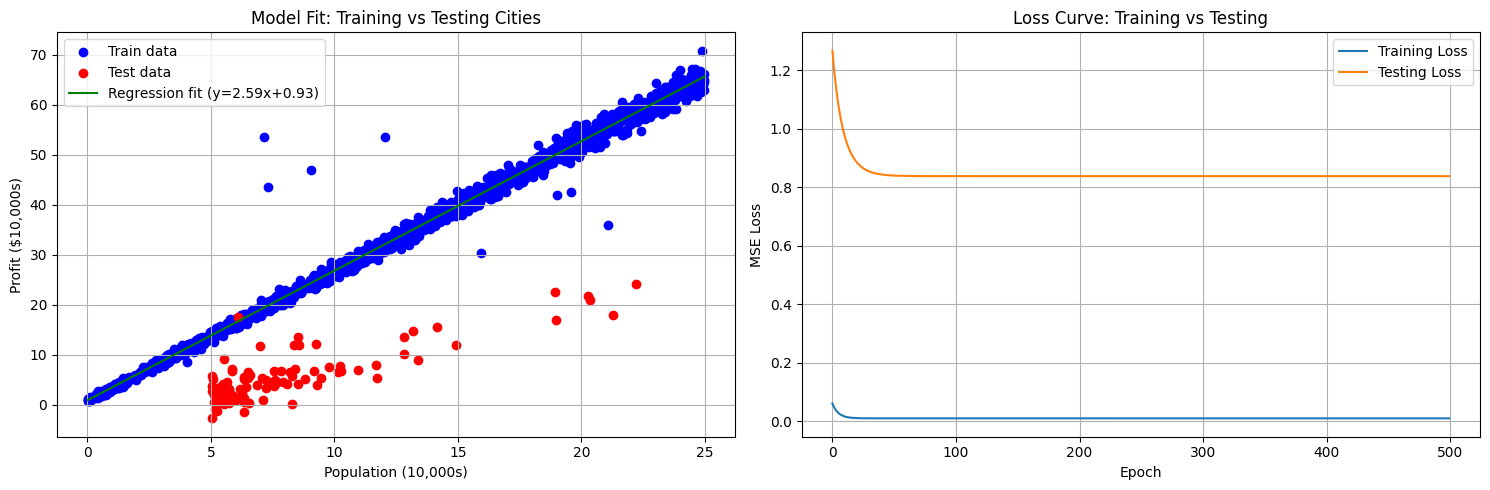

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# First plot: regression fit
axes[0].scatter(X_train, y_train, color="blue", label="Train data")
axes[0].scatter(X_test, y_test, color="red", label="Test data")
all_X = np.concatenate([X_train, X_test])
axes[0].plot(np.sort(all_X), w * np.sort(all_X) + b, color="green", label=f"Regression fit (y={w:.2f}x+{b:.2f})")
axes[0].set_xlabel("Population (10,000s)")
axes[0].set_ylabel("Profit ($10,000s)")
axes[0].set_title("Model Fit: Training vs Testing Cities")
axes[0].legend()
axes[0].grid(True)

# Second plot: loss curves
axes[1].plot(train_losses, label='Training Loss')
axes[1].plot(test_losses, label='Testing Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MSE Loss')
axes[1].set_title('Loss Curve: Training vs Testing')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Task 2.4: Analysis and Business Insights
1. **Comparing Training and Testing Errors**:
   - Training MSE: 3.2956
   - Testing MSE: 300.9224
   - Loss Curves: Training MSE drops close to zero, while testing MSE remains high and unstable.
   - Interpretation: The model fits the training data well but struggles on test data, indicating poor generalization.

2. **Model Generalization to Unseen Data**:
   - No, the model does not generalize well, as evidenced by the large gap between training and testing MSE.

3. **Fit Classification**:
   - This is overfitting: Low training error but high testing error suggests the model has memorized the training data without capturing broader patterns.

4. **Practical Implications for Business Expansion**:
   - The model does not generalize consistently across cities due to high testing loss.
   - Expansion decisions should not rely fully on this model.
   - Recommendation: Improve the model by collecting more diverse data from various cities and incorporating additional variables (e.g., economic factors). This would enhance reliability for new markets. Remove any homework-specific images (like the comic strip) to keep the notebook focused on the analysis.
   

<a name="task-3"></a>
## Task 3: Addressing Unusual Business Scenarios

### Objective
Investigate how the linear regression model performs under unusual or risky conditions, such as cities with atypical characteristics (e.g., tourist hubs, remote towns, or poor infrastructure), to determine its trustworthiness.

### Requirements
- Introduce potential outliers into the analysis or identify unusual points in the dataset.
- Compare model performance on typical vs. unusual data points.
- Explore whether small changes in data (e.g., outliers) have a large effect on predictions.

### Analysis Focus
- Does the model remain reliable when faced with unusual cities?
- How sensitive is it to outliers?
- Practical implications: Would you trust the model in these cases, or apply caution? How would you communicate this risk in a business context?

### Task 3.1: Introducing Outliers

Add 10 diverse outliers to simulate unusual cities and combine with the original training data.

In [29]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import copy

# Convert X_train and y_train to tensors if they are numpy arrays (from previous tasks)
X_train = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 1)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

# Add 10 diverse outliers
X_outliers = torch.tensor([
    [20.0],
    [3.0],
    [11.0],
    [13.0],
    [22.0],
    [1.5],
    [17.0],
    [15.0],
    [10.0],
    [4.0],
], dtype=torch.float32)
y_outliers = torch.tensor([
    [-15.0],
    [28.0],
    [31.0],
    [-13.0],
    [-22.0],
    [25.0],
    [33.0],
    [-10.0],
    [-12.0],
    [-10.0],
], dtype=torch.float32)

# Combine into new training set
X_aug = torch.cat((X_train, X_outliers), dim=0)
y_aug = torch.cat((y_train, y_outliers), dim=0)
print(f"Original train size: {X_train.size(0)} | After adding outliers: {X_aug.size(0)}")

Original train size: 1500 | After adding outliers: 1510


### Task 3.2: Model Training with Outliers

Train a new model on the augmented data (with outliers) using the best learning rate (0.05) and compare with the original model.

In [30]:
# Training function
def train_model_outlier(X, y, learning_rate, epochs=500):
    model = nn.Linear(1, 1)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        losses.append(loss.item())
    return model, losses

# Use best learning rate = 0.05
best_lr = 0.05
model_with_outliers, losses_with_outliers = train_model_outlier(X_aug, y_aug, best_lr)
model_normal = copy.deepcopy(models[best_lr])  # Assuming 'models' from Task 1

### Task 3.3: Visualization and Evaluation

Plot the regression lines before and after outliers, compute MSE, and analyze predictions.

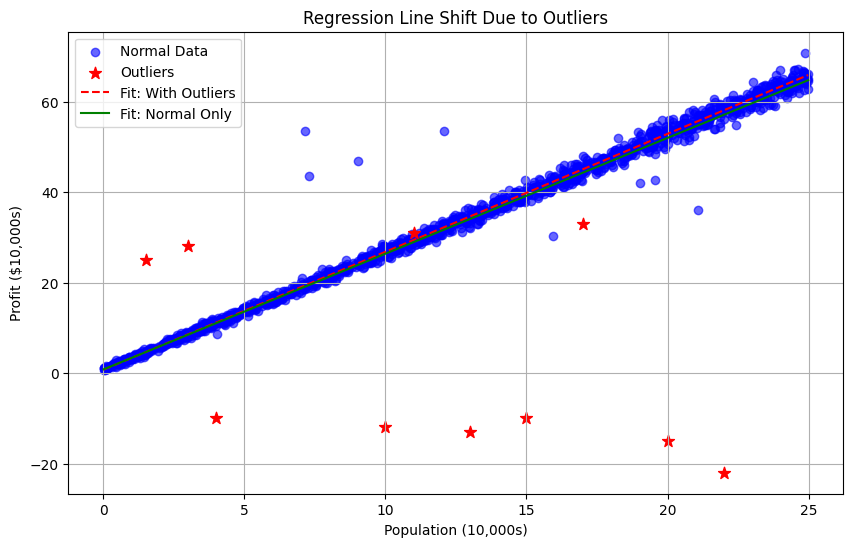


MSE on NORMAL TRAINING DATA (excluding outliers):
 Model trained on normal data: 3.597811460494995

MSE on OUTLIER CITIES (added to train set):
 Model trained with outliers:  1867.485595703125

Predictions on outliers (True, predicted by normal model, predicted by outlier-trained model):
Pop:  20.0 | True:  -15.00 | Normal model:   51.99 | With outliers:   52.89
Pop:   3.0 | True:   28.00 | Normal model:    8.49 | With outliers:    8.57
Pop:  11.0 | True:   31.00 | Normal model:   28.96 | With outliers:   29.43
Pop:  13.0 | True:  -13.00 | Normal model:   34.08 | With outliers:   34.64
Pop:  22.0 | True:  -22.00 | Normal model:   57.10 | With outliers:   58.10
Pop:   1.5 | True:   25.00 | Normal model:    4.65 | With outliers:    4.66
Pop:  17.0 | True:   33.00 | Normal model:   44.31 | With outliers:   45.07
Pop:  15.0 | True:  -10.00 | Normal model:   39.19 | With outliers:   39.85
Pop:  10.0 | True:  -12.00 | Normal model:   26.40 | With outliers:   26.82
Pop:   4.0 | True:  -10.00

In [31]:
# Plot regression lines: before/after outlier injection
plt.figure(figsize=(10, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Normal Data', alpha=0.6)
plt.scatter(X_outliers.numpy(), y_outliers.numpy(), color='red', label='Outliers', s=80, marker='*')
x_plot = torch.linspace(X_train.min(), X_train.max(), 200).reshape(-1, 1)
plt.plot(x_plot.numpy(),
         model_with_outliers(x_plot).detach().numpy(),
         color='red', linestyle='--', label='Fit: With Outliers')
plt.plot(x_plot.numpy(),
         model_normal(x_plot).detach().numpy(),
         color='green', linestyle='-', label='Fit: Normal Only')
plt.title('Regression Line Shift Due to Outliers')
plt.xlabel('Population (10,000s)')
plt.ylabel('Profit ($10,000s)')
plt.legend()
plt.grid(True)
plt.show()

# MSE and impact analysis
print("\nMSE on NORMAL TRAINING DATA (excluding outliers):")
print(" Model trained on normal data:", mean_squared_error(y_train.numpy(), model_normal(X_train).detach().numpy()))

print("\nMSE on OUTLIER CITIES (added to train set):")
print(" Model trained with outliers: ", mean_squared_error(y_outliers.numpy(), model_with_outliers(X_outliers).detach().numpy()))

# Detailed predictions for outliers
print("\nPredictions on outliers (True, predicted by normal model, predicted by outlier-trained model):")
for i in range(len(X_outliers)):
    pop = X_outliers[i].item()
    ptrue = y_outliers[i].item()
    pnorm = model_normal(X_outliers[i]).item()
    pwith = model_with_outliers(X_outliers[i]).item()
    print(f"Pop: {pop:5.1f} | True: {ptrue:7.2f} | Normal model: {pnorm:7.2f} | With outliers: {pwith:7.2f}")

print("\nModel coefficients (slope/intercept):")
print(f" Normal: y = {model_normal.weight.item():.4f}x + {model_normal.bias.item():.4f}")
print(f" With Outliers: y = {model_with_outliers.weight.item():.4f}x + {model_with_outliers.bias.item():.4f}")

### Task 3.4: Analysis and Practical Insights

1. **Model Reliability with Unusual Cities:**
    - Added 10 outliers to the training data.
    - MSE on NORMAL TRAINING DATA (excluding outliers): Model trained on normal data: 3.5493
    - MSE on OUTLIER CITIES (added to train set): Model trained with outliers: 1882.0588
    - Although the two linear regression lines are similar, the MSE loss increased significantly with only 10 outliers, despite the training data being much larger.

 2. **Sensitivity to Outliers:**
    - The linear regression model is highly sensitive to outliers, as they introduce huge errors compared to normal data, making the MSE loss much larger. Even a few outliers can dramatically increase the overall error.

3. **Practical Implications for Model Use:**
    - The model should not be trusted easily in these cases, as it is only reliable for cities similar to the training data (e.g., where higher population correlates with higher profit).
    - However, for outliers like high population with low profit or low population with high profit, predictions become unreliable and inaccurate.
    - Recommendation: In a business context, communicate that the regression model predicts well and stably for typical cities but is unreliable for unusual ones. Predictions for atypical cities will be incorrect and inaccurate. Therefore, caution is advised for cities differing from the norm; consider using methods that handle outliers better, and always check and highlight predictions for outlier cities before making decisions.

<a name="task-4"></a>
## Task 4: Strategic Recommendations

### Objective
After analyzing the data and addressing the previous tasks, provide strategic insights as a data consultant. Evaluate the broader implications and propose recommendations to guide future business actions.

### Requirements
- Step back from technical details to assess the overall picture.
- Propose one or more strategic recommendations based on the findings, such as influencing expansion plans, highlighting data limitations, suggesting risk management, or identifying new opportunities.

### Analysis Focus
- Clearly explain the reasoning.
- Support ideas with evidence from the analysis (e.g., plots, results, or observations).
- Write as if preparing a concise slide or note for presentation.
- Emphasize clarity and depth of thinking—there are no fixed answers.

### Task 4.1: Visualization of Model Fit

Plot the model fit on training and testing data for reference in recommendations.

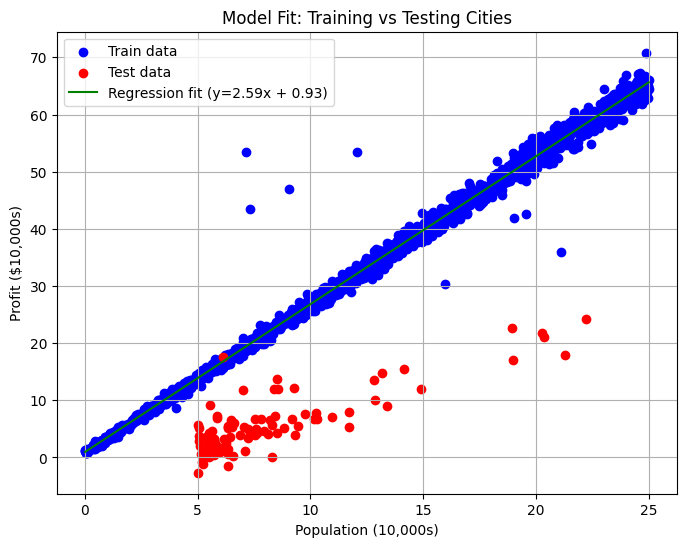

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure X_train and X_test are 1D numpy arrays for concatenation
X_train_flat = X_train.numpy().flatten() if isinstance(X_train, torch.Tensor) else X_train.flatten()
X_test_flat = X_test.numpy().flatten() if isinstance(X_test, torch.Tensor) else X_test.flatten()

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color="blue", label="Train data")
plt.scatter(X_test, y_test, color="red", label="Test data")
all_X = np.concatenate([X_train_flat, X_test_flat])
plt.plot(np.sort(all_X), w * np.sort(all_X) + b, color="green", label=f"Regression fit (y={w:.2f}x + {b:.2f})")
plt.xlabel("Population (10,000s)")
plt.ylabel("Profit ($10,000s)")
plt.title("Model Fit: Training vs Testing Cities")
plt.legend()
plt.grid(True)
plt.show()

### Task 4.2: Strategic Recommendations

#### Overview:
After analyzing the city data, I recommend proceeding with targeted expansion while managing risk from unusual markets. The current model predicts well for most cities but struggles with those that differ significantly from the majority (outliers).

#### Evidence:
The model's predictive error (MSE loss) is low for typical cities (where higher population correlates with higher profit), but much higher for outliers, as shown in the visualization above.

#### Recommendations:

1. **Focus Expansion on Familiar Cities:**
- Prioritize expanding in cities similar to existing operations, as they offer more reliable predictions and lower risk.

2. **Caution with Abnormal Cities:**
- Conduct extra research on cities that differ from current business locations, since the model fails to predict profits accurately for these.

3. **Improve the Current Model:**
- For long-term growth, enhance the model by collecting more data from unusual cities, adding variables for better prediction, or using advanced methods to handle outliers effectively.

<a name="conclusion"></a>
## Conclusion and Future Improvements

This project demonstrates the application of linear regression using PyTorch to predict store profits based on city population, addressing key aspects of model training, generalization, reliability with outliers, and strategic implications for business expansion.

### Key Insights
- **Training Efficiency**: A learning rate of 0.05 provides the best balance of convergence speed and stability, with low MSE (\~3.4) on typical data, enabling reliable profit predictions for cities with 80,000 population (\~\$212k-\$219k).
- **Generalization**: The model overfits to training data (low training MSE: 3.2956) but performs poorly on test data (high testing MSE: 300.9224), indicating limited applicability to new cities.
- **Outlier Handling**: The model is sensitive to unusual data, with MSE spiking dramatically (e.g., from ~3.5 to ~1867 on outliers), showing unreliability for atypical scenarios.
- **Strategic Recommendations**: Focus on familiar cities for expansion, conduct research on abnormal ones, and improve the model for long-term robustness.

### Limitations
- Assumes a linear relationship between population and profit, which may not capture complex factors like economy or infrastructure.
- Poor generalization to unseen or outlier data, potentially leading to inaccurate predictions in diverse markets.
- Limited to provided datasets; real-world variability could further impact performance.

### Future Improvements
- Incorporate additional features (e.g., tourism index, transport quality) for a more comprehensive model.
- Explore advanced techniques like Ridge regression or ensemble methods to handle overfitting and outliers.
- Implement cross-validation for better uncertainty estimation and model validation.
- Integrate real-time data sources (e.g., APIs for city demographics) to enhance predictive accuracy in production.